<a href="https://colab.research.google.com/github/kushal-jaat/ASD-assignment-3/blob/main/housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
import pandas as pd

# Mount Google Drive to access the datasets
from google.colab import drive
drive.mount('/content/drive')

# Load the datasets using the provided paths
# sales_data = pd.read_csv('/content/drive/My Drive/housing/housing-sales-borough.csv')  # Sales dataset path
rental_data = pd.read_csv('/content/drive/My Drive/housing/housing1.csv')  # Rental dataset path

# Display the first few rows to confirm loading
# print("Sales Data Sample:")
# print(sales_data.head())

print("\nRental Data Sample:")
print(rental_data.head())



Mounted at /content/drive

Rental Data Sample:
           id                                                url  \
0  7049044568  https://reno.craigslist.org/apa/d/reno-beautif...   
1  7049047186  https://reno.craigslist.org/apa/d/reno-reduced...   
2  7043634882  https://reno.craigslist.org/apa/d/sparks-state...   
3  7049045324  https://reno.craigslist.org/apa/d/reno-1x1-fir...   
4  7049043759  https://reno.craigslist.org/apa/d/reno-no-long...   

         region                   region_url  price       type  sqfeet  beds  \
0  reno / tahoe  https://reno.craigslist.org   1148  apartment    1078     3   
1  reno / tahoe  https://reno.craigslist.org   1200      condo    1001     2   
2  reno / tahoe  https://reno.craigslist.org   1813  apartment    1683     2   
3  reno / tahoe  https://reno.craigslist.org   1095  apartment     708     1   
4  reno / tahoe  https://reno.craigslist.org    289  apartment     250     0   

   baths  cats_allowed  ...  wheelchair_access  electric_vehicl

In [3]:
# Inspect the sales_data structure
# print("Sales Data Information:")
# sales_data.info()

# print("\nSales Data Column Summary:")
# print(sales_data.describe(include='all'))

# print("\nSales Data Sample:")
# print(sales_data.head())

# Inspect the rental_data structure
print("\nRental Data Information:")
rental_data.info()

print("\nRental Data Column Summary:")
print(rental_data.describe(include='all'))

print("\nRental Data Sample:")
print(rental_data.head())



Rental Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 n

In [4]:
# # Check for missing values in sales_data
# print("Missing Values in Sales Data:")
# print(sales_data.isnull().sum())

# # Check for missing values in rental_data
# print("\nMissing Values in Rental Data:")
# print(rental_data.isnull().sum())


In [5]:
# # Check unique types in each column to identify any mixed data types across the entire dataset
# for col in sales_data.columns:
#     print(f"\nUnique types in column '{col}':")
#     print(sales_data[col].apply(type).value_counts())


In [6]:
# # Replace float values in 'Address' and 'Non Use Code' with "Unknown" to make the data consistent
# sales_data['Address'] = sales_data['Address'].fillna("Unknown")
# sales_data['Non Use Code'] = sales_data['Non Use Code'].fillna("Unknown").astype(str)

# # Verify the changes
# print("\nUpdated types in 'Address':")
# print(sales_data['Address'].apply(type).value_counts())

# print("\nUpdated types in 'Non Use Code':")
# print(sales_data['Non Use Code'].apply(type).value_counts())


In [7]:
# # Reconfirm filling of 'Address' and 'Non Use Code' if necessary
# sales_data['Address'] = sales_data['Address'].fillna("Unknown")
# sales_data['Non Use Code'] = sales_data['Non Use Code'].fillna("Unknown").astype(str)


# # Drop unnecessary columns such as 'Assessor Remarks', 'OPM remarks', 'Location' (if these are not useful for modeling)
# sales_data.drop(columns=['Assessor Remarks', 'OPM remarks', 'Location'], inplace=True)

# # Display a summary to verify
# print("Updated sales_data info after handling missing values and dropping unnecessary columns:")
# print(sales_data.info())


In [8]:
# # Drop date-related columns as they are not essential for prediction
# sales_data.drop(columns=['Date Recorded'], inplace=True)

# # Verify the final structure of sales_data
# print("Final sales_data info after dropping date-related columns:")
# print(sales_data.info())


In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plotting the distribution of 'Sale Amount'
# plt.figure(figsize=(10, 6))
# sns.histplot(sales_data['Sale Amount'], bins=50, kde=True)
# plt.title('Distribution of Sale Amount')
# plt.xlabel('Sale Amount')
# plt.ylabel('Frequency')
# plt.show()

# # Display basic statistics for 'Sale Amount'
# print("Basic Statistics for 'Sale Amount':")
# print(sales_data['Sale Amount'].describe())


In [10]:
# import numpy as np
# import seaborn as sns
# # Apply log transformation to 'Sale Amount', adding 1 to avoid log(0) for zero values
# sales_data['Sale Amount Log'] = np.log1p(sales_data['Sale Amount'])

# # Plot the transformed distribution
# plt.figure(figsize=(10, 6))
# sns.histplot(sales_data['Sale Amount Log'], bins=50, kde=True)
# plt.title('Distribution of Log-Transformed Sale Amount')
# plt.xlabel('Log-Transformed Sale Amount')
# plt.ylabel('Frequency')
# plt.show()


In [11]:
# # Calculate IQR to identify outliers in the target column (Sale Amount Log)
# q1 = sales_data['Sale Amount Log'].quantile(0.25)
# q3 = sales_data['Sale Amount Log'].quantile(0.75)
# iqr = q3 - q1

# # Define lower and upper bounds
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr

# # Filter rows within the acceptable range
# sales_data_cleaned = sales_data[
#     (sales_data['Sale Amount Log'] >= lower_bound) &
#     (sales_data['Sale Amount Log'] <= upper_bound)
# ]

# # Print outlier statistics
# print(f"Original dataset size: {sales_data.shape[0]}")
# print(f"Cleaned dataset size: {sales_data_cleaned.shape[0]}")
# print(f"Number of outliers removed: {sales_data.shape[0] - sales_data_cleaned.shape[0]}")

# # Continue with data preprocessing (e.g., scaling) and splitting


In [12]:
# # Add the log-transformed 'Sale Amount Log' column to the correlation matrix
# numeric_columns = ['Assessed Value', 'Sales Ratio', 'Sale Amount Log']  # Adjust this list as needed for other numerical features
# correlation_matrix = sales_data[numeric_columns].corr()

# # Plot the correlation heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Matrix with Log-Transformed Sale Amount")
# plt.show()


In [13]:
# # Calculate the mean Sale Amount Log for each town and sort by frequency
# top_towns = sales_data['Town'].value_counts().nlargest(10).index
# town_avg_sale_amount = sales_data[sales_data['Town'].isin(top_towns)].groupby('Town')['Sale Amount Log'].mean().sort_values()

# # Plotting the average Sale Amount Log by Town
# plt.figure(figsize=(12, 6))
# sns.barplot(x=town_avg_sale_amount.index, y=town_avg_sale_amount.values, palette="viridis")
# plt.title('Average Log-Transformed Sale Amount by Town (Top 10)')
# plt.xlabel('Town')
# plt.ylabel('Average Sale Amount Log')
# plt.xticks(rotation=45)
# plt.show()


In [14]:
# # Calculate the mean Sale Amount Log for each Property Type
# property_type_avg_sale_amount = sales_data.groupby('Property Type')['Sale Amount Log'].mean().sort_values()

# # Plotting the average Sale Amount Log by Property Type
# plt.figure(figsize=(10, 6))
# sns.barplot(x=property_type_avg_sale_amount.index, y=property_type_avg_sale_amount.values, palette="viridis")
# plt.title('Average Log-Transformed Sale Amount by Property Type')
# plt.xlabel('Property Type')
# plt.ylabel('Average Sale Amount Log')
# plt.xticks(rotation=45)
# plt.show()


In [15]:
# # Calculate the mean Sale Amount Log for each Residential Type
# residential_type_avg_sale_amount = sales_data.groupby('Residential Type')['Sale Amount Log'].mean().sort_values()

# # Plotting the average Sale Amount Log by Residential Type
# plt.figure(figsize=(10, 6))
# sns.barplot(x=residential_type_avg_sale_amount.index, y=residential_type_avg_sale_amount.values, palette="viridis")
# plt.title('Average Log-Transformed Sale Amount by Residential Type')
# plt.xlabel('Residential Type')
# plt.ylabel('Average Sale Amount Log')
# plt.xticks(rotation=45)
# plt.show()


In [16]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# # Step 1: Target Encoding for 'Town'
# # Calculate mean Sale Amount Log for each town
# town_target_mean = sales_data.groupby('Town')['Sale Amount Log'].mean()
# # Map the mean Sale Amount Log to each town
# sales_data['Town_Encoded'] = sales_data['Town'].map(town_target_mean)

# # Step 2: One-Hot Encoding for 'Property Type' and 'Residential Type'
# # Use pandas get_dummies for one-hot encoding
# sales_data = pd.get_dummies(sales_data, columns=['Property Type', 'Residential Type'], drop_first=True)

# # Drop the original 'Town' column (if not needed after encoding)
# sales_data.drop(columns=['Town'], inplace=True)

# # Display the first few rows to confirm the encoding
# print(sales_data.head())


In [17]:
# # Step 1: Drop irrelevant column 'Address'
# if 'Address' in sales_data.columns:
#     sales_data = sales_data.drop(columns=['Address'])
#     print("Dropped 'Address' column.")

# # Step 2: One-hot encode 'Non Use Code'
# if 'Non Use Code' in sales_data.columns:
#     sales_data = pd.get_dummies(sales_data, columns=['Non Use Code'], drop_first=True)
#     print("Applied one-hot encoding to 'Non Use Code'.")

# # Step 3: Convert boolean columns to numeric
# bool_columns = sales_data.select_dtypes(include=['bool']).columns
# if len(bool_columns) > 0:
#     sales_data[bool_columns] = sales_data[bool_columns].astype(int)
#     print("Converted boolean columns to numeric.")

# # Step 4: Verify all columns are numeric
# non_numeric_columns = sales_data.select_dtypes(exclude=['number']).columns
# if len(non_numeric_columns) == 0:
#     print("All columns are numeric. Dataset is ready for modeling!")
# else:
#     print(f"Non-numeric columns remain: {non_numeric_columns.tolist()}")

# # Display the final shape and first few rows of the processed dataset
# print(f"Final Sales Dataset Shape: {sales_data.shape}")
# print(sales_data.head())


In [18]:

# from sklearn.preprocessing import StandardScaler

# # Select numerical columns to scale
# numeric_features = ['Assessed Value', 'Sales Ratio', 'Town_Encoded']
# scaler = StandardScaler()

# # Apply the scaler to the selected numerical columns
# sales_data[numeric_features] = scaler.fit_transform(sales_data[numeric_features])

# # Display the first few rows to confirm scaling
# print(sales_data[numeric_features].head())


In [19]:
# # Step 1: Check for non-numeric columns
# non_numeric_columns = sales_data.select_dtypes(exclude=['number']).columns
# print("Non-numeric columns in Sales Dataset:")
# print(non_numeric_columns)

# # Step 2: Display sample values from non-numeric columns
# if len(non_numeric_columns) > 0:
#     for col in non_numeric_columns:
#         print(f"\nSample data from column '{col}':")
#         print(sales_data[col].unique()[:5])  # Display a few unique values for inspection
# else:
#     print("All columns in Sales Dataset are numeric.")


In [20]:
# # Define features and target
# X = sales_data.drop(columns=['Serial Number', 'Sale Amount', 'Sale Amount Log'])  # Dropping unnecessary columns
# y = sales_data['Sale Amount Log']


In [21]:
# Check missing values in the hosing dataset
print("Missing values in each column:")
print(rental_data.isnull().sum())


Missing values in each column:
id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64


In [22]:
# Check data types of each column
print("Data types of each column:")
print(rental_data.dtypes)


Data types of each column:
id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object


In [23]:
# Check column names and shape
print("Columns in the dataset:")
print(rental_data.columns)
print(f"Shape of the dataset: {rental_data.shape}")


Columns in the dataset:
Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')
Shape of the dataset: (384977, 22)


In [24]:
# Handle missing values for categorical columns (laundry_options, parking_options) without inplace
rental_data['laundry_options'] = rental_data['laundry_options'].fillna(rental_data['laundry_options'].mode()[0])
rental_data['parking_options'] = rental_data['parking_options'].fillna(rental_data['parking_options'].mode()[0])

# Drop rows with missing description, lat, and long
rental_data = rental_data.dropna(subset=['description', 'lat', 'long'])

# Check if there are still missing values
print("Missing values after handling:")
print(rental_data.isnull().sum())

# Show the shape of the dataset after handling missing values
print("Shape after handling missing values:", rental_data.shape)


Missing values after handling:
id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64
Shape after handling missing values: (383057, 22)


In [25]:
# Select the columns for one-hot encoding
columns_to_encode = ['region', 'type', 'laundry_options', 'parking_options', 'state']

# Apply one-hot encoding
rental_data_encoded = pd.get_dummies(rental_data, columns=columns_to_encode, drop_first=True)

# Check the columns after encoding
print("Columns after One-Hot Encoding:")
print(rental_data_encoded.columns)

# Check the shape after encoding
print("Shape of dataset after One-Hot Encoding:", rental_data_encoded.shape)


Columns after One-Hot Encoding:
Index(['id', 'url', 'region_url', 'price', 'sqfeet', 'beds', 'baths',
       'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       ...
       'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt',
       'state_wa', 'state_wi', 'state_wv', 'state_wy'],
      dtype='object', length=491)
Shape of dataset after One-Hot Encoding: (383057, 491)


In [26]:
# Dropping unnecessary columns
columns_to_drop = ['id', 'url', 'region_url', 'image_url',]
rental_data_encoded.drop(columns=columns_to_drop, inplace=True)

# Check the shape and first few rows after dropping the columns
print(f"Shape of dataset after dropping unnecessary columns: {rental_data_encoded.shape}")
print(rental_data_encoded.head())


Shape of dataset after dropping unnecessary columns: (383057, 487)
   price  sqfeet  beds  baths  cats_allowed  dogs_allowed  smoking_allowed  \
0   1148    1078     3    2.0             1             1                0   
1   1200    1001     2    2.0             0             0                0   
2   1813    1683     2    2.0             1             1                1   
3   1095     708     1    1.0             1             1                1   
4    289     250     0    1.0             1             1                1   

   wheelchair_access  electric_vehicle_charge  comes_furnished  ... state_sd  \
0                  0                        0                0  ...    False   
1                  0                        0                0  ...    False   
2                  0                        0                0  ...    False   
3                  0                        0                0  ...    False   
4                  1                        0                1  

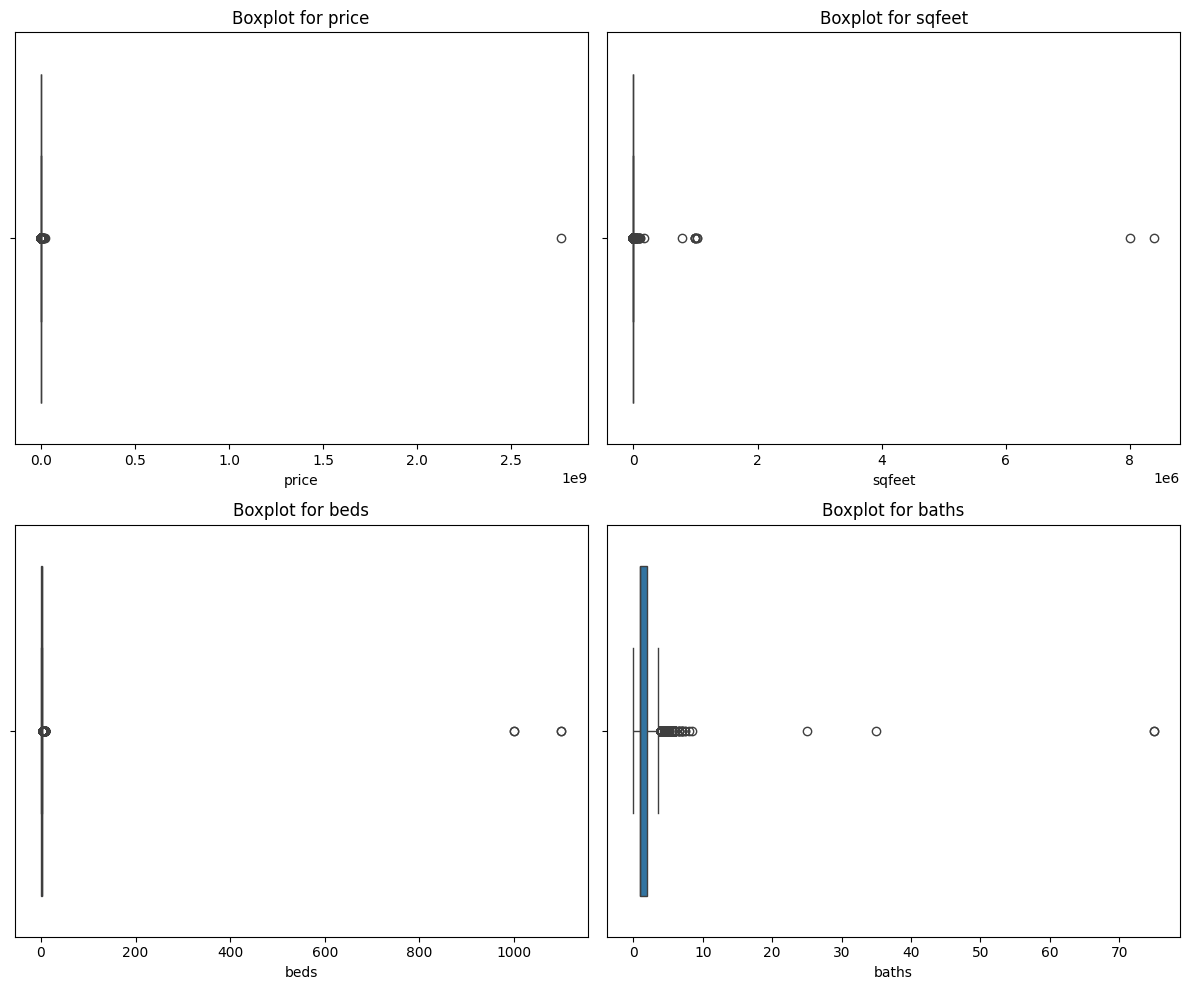

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns to check for outliers
numerical_columns = ['price', 'sqfeet', 'beds', 'baths']

# Plot boxplots to identify outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=rental_data_encoded[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()


In [28]:

import numpy as np

# Reinitialize the cleaned dataset
rental_data_cleaned = rental_data_encoded.copy()

# List of columns to apply log transformation
columns_to_transform = ['price', 'sqfeet', 'beds', 'baths']

# Apply log transformation (adding 1 to avoid log(0))
for column in columns_to_transform:
    rental_data_cleaned[column + '_log'] = np.log1p(rental_data_cleaned[column])

# Check the transformed columns
print("Log-transformed columns preview:")
print(rental_data_cleaned[[col + '_log' for col in columns_to_transform]].head())

# Check the shape of the dataset
print("Shape of the dataset after log transformation:", rental_data_cleaned.shape)


Log-transformed columns preview:
   price_log  sqfeet_log  beds_log  baths_log
0   7.046647    6.983790  1.386294   1.098612
1   7.090910    6.909753  1.098612   1.098612
2   7.503290    7.428927  1.098612   1.098612
3   6.999422    6.563856  0.693147   0.693147
4   5.669881    5.525453  0.000000   0.693147
Shape of the dataset after log transformation: (383057, 491)


In [29]:
# List of log-transformed columns to check for outliers
columns_to_filter = ['price_log', 'sqfeet_log', 'beds_log', 'baths_log']

# Remove outliers based on IQR
for col in columns_to_filter:
    Q1 = rental_data_cleaned[col].quantile(0.25)
    Q3 = rental_data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    rental_data_cleaned = rental_data_cleaned[
        (rental_data_cleaned[col] >= lower_bound) & (rental_data_cleaned[col] <= upper_bound)
    ]

# Check the shape after removing outliers
print("Shape after removing outliers (IQR method):", rental_data_cleaned.shape)


Shape after removing outliers (IQR method): (351307, 491)


In [30]:
# Define explicit bounds for persistent outliers
columns_to_filter = ['price_log', 'sqfeet_log']
for col in columns_to_filter:
    Q1 = rental_data_cleaned[col].quantile(0.25)
    Q3 = rental_data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # IQR lower bound
    upper_bound = Q3 + 1.5 * IQR  # IQR upper bound

    # Combine Z-score limits (3 standard deviations) with IQR limits
    mean = rental_data_cleaned[col].mean()
    std = rental_data_cleaned[col].std()
    z_lower_bound = mean - 3 * std
    z_upper_bound = mean + 3 * std

    # Take the stricter of the two methods
    final_lower_bound = max(lower_bound, z_lower_bound)
    final_upper_bound = min(upper_bound, z_upper_bound)

    # Remove rows outside the final bounds
    rental_data_cleaned = rental_data_cleaned[
        (rental_data_cleaned[col] >= final_lower_bound) &
        (rental_data_cleaned[col] <= final_upper_bound)
    ]

# Check the final shape of the dataset
print("Final dataset shape after removing persistent outliers:", rental_data_cleaned.shape)


Final dataset shape after removing persistent outliers: (348403, 491)


In [31]:
# Remove the remaining outliers by setting absolute bounds
for col in ['price_log', 'sqfeet_log']:
    Q1 = rental_data_cleaned[col].quantile(0.25)
    Q3 = rental_data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove all rows outside the IQR bounds
    rental_data_cleaned = rental_data_cleaned[
        (rental_data_cleaned[col] >= lower_bound) &
        (rental_data_cleaned[col] <= upper_bound)
    ]

# Verify the dataset shape
print("Final dataset shape after removing all outliers:", rental_data_cleaned.shape)


Final dataset shape after removing all outliers: (348162, 491)


In [32]:
# Recalculate the number of outliers in the cleaned dataset
outliers_remaining = {}

for col in ['price_log', 'sqfeet_log', 'beds_log', 'baths_log']:
    Q1 = rental_data_cleaned[col].quantile(0.25)
    Q3 = rental_data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count remaining outliers
    outliers_remaining[col] = ((rental_data_cleaned[col] < lower_bound) |
                               (rental_data_cleaned[col] > upper_bound)).sum()

# Display the number of remaining outliers
print("Number of outliers remaining in each column (IQR method):")
print(outliers_remaining)


Number of outliers remaining in each column (IQR method):
{'price_log': 0, 'sqfeet_log': 0, 'beds_log': 0, 'baths_log': 0}


In [33]:
log_columns = ['price_log', 'sqfeet_log', 'beds_log', 'baths_log']


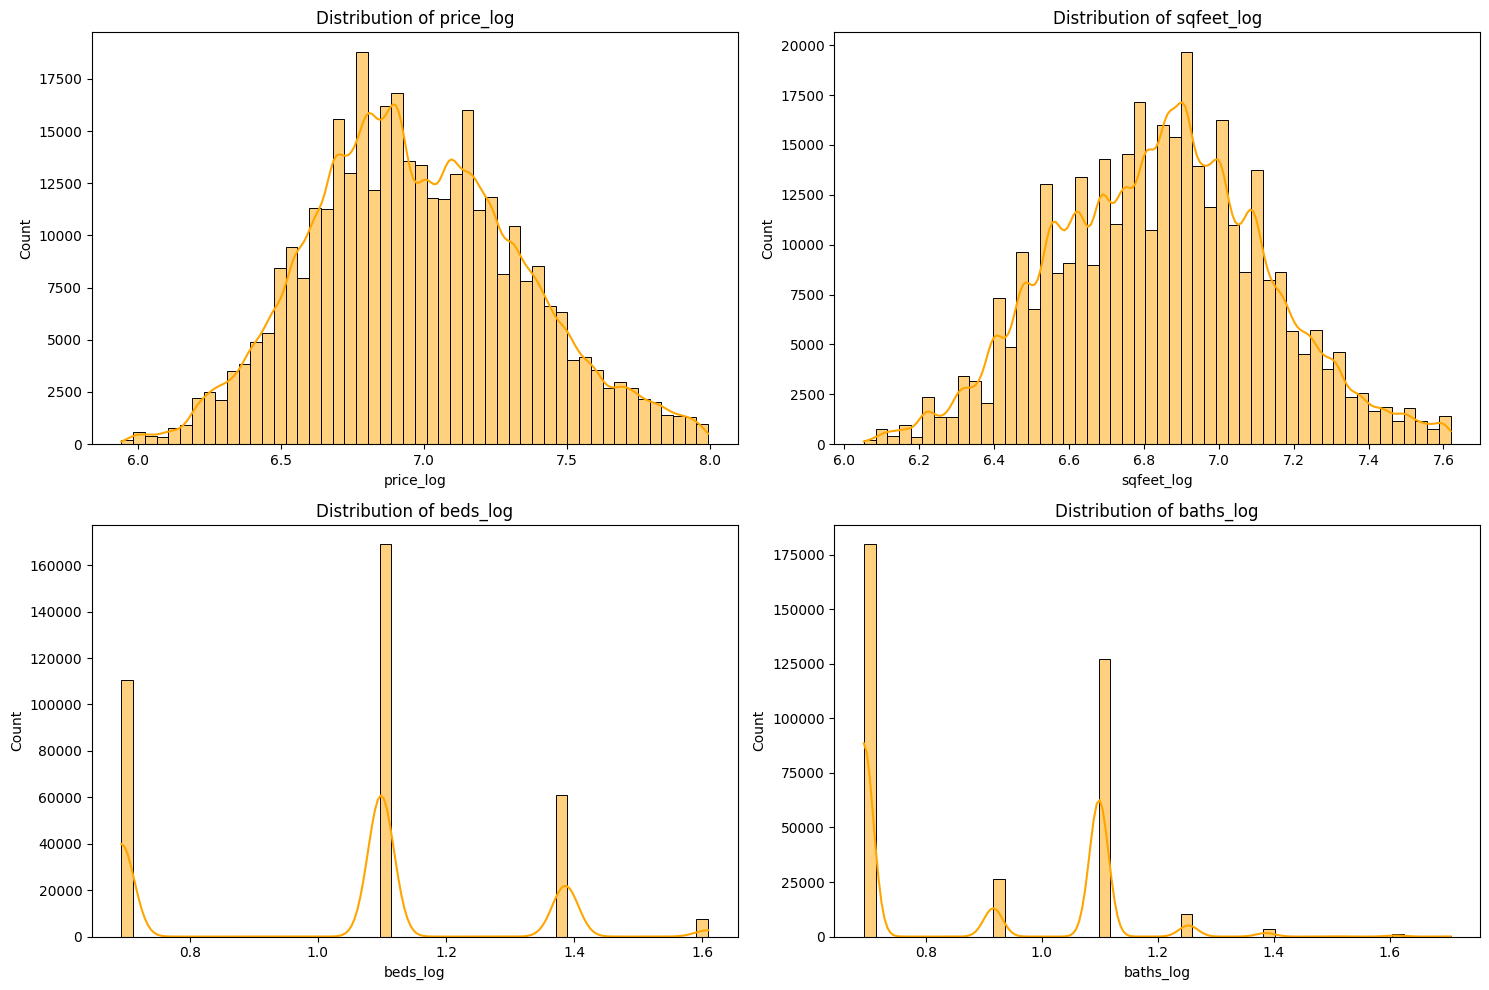

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms to show distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(log_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(rental_data_cleaned[col], kde=True, bins=50, color='orange')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()



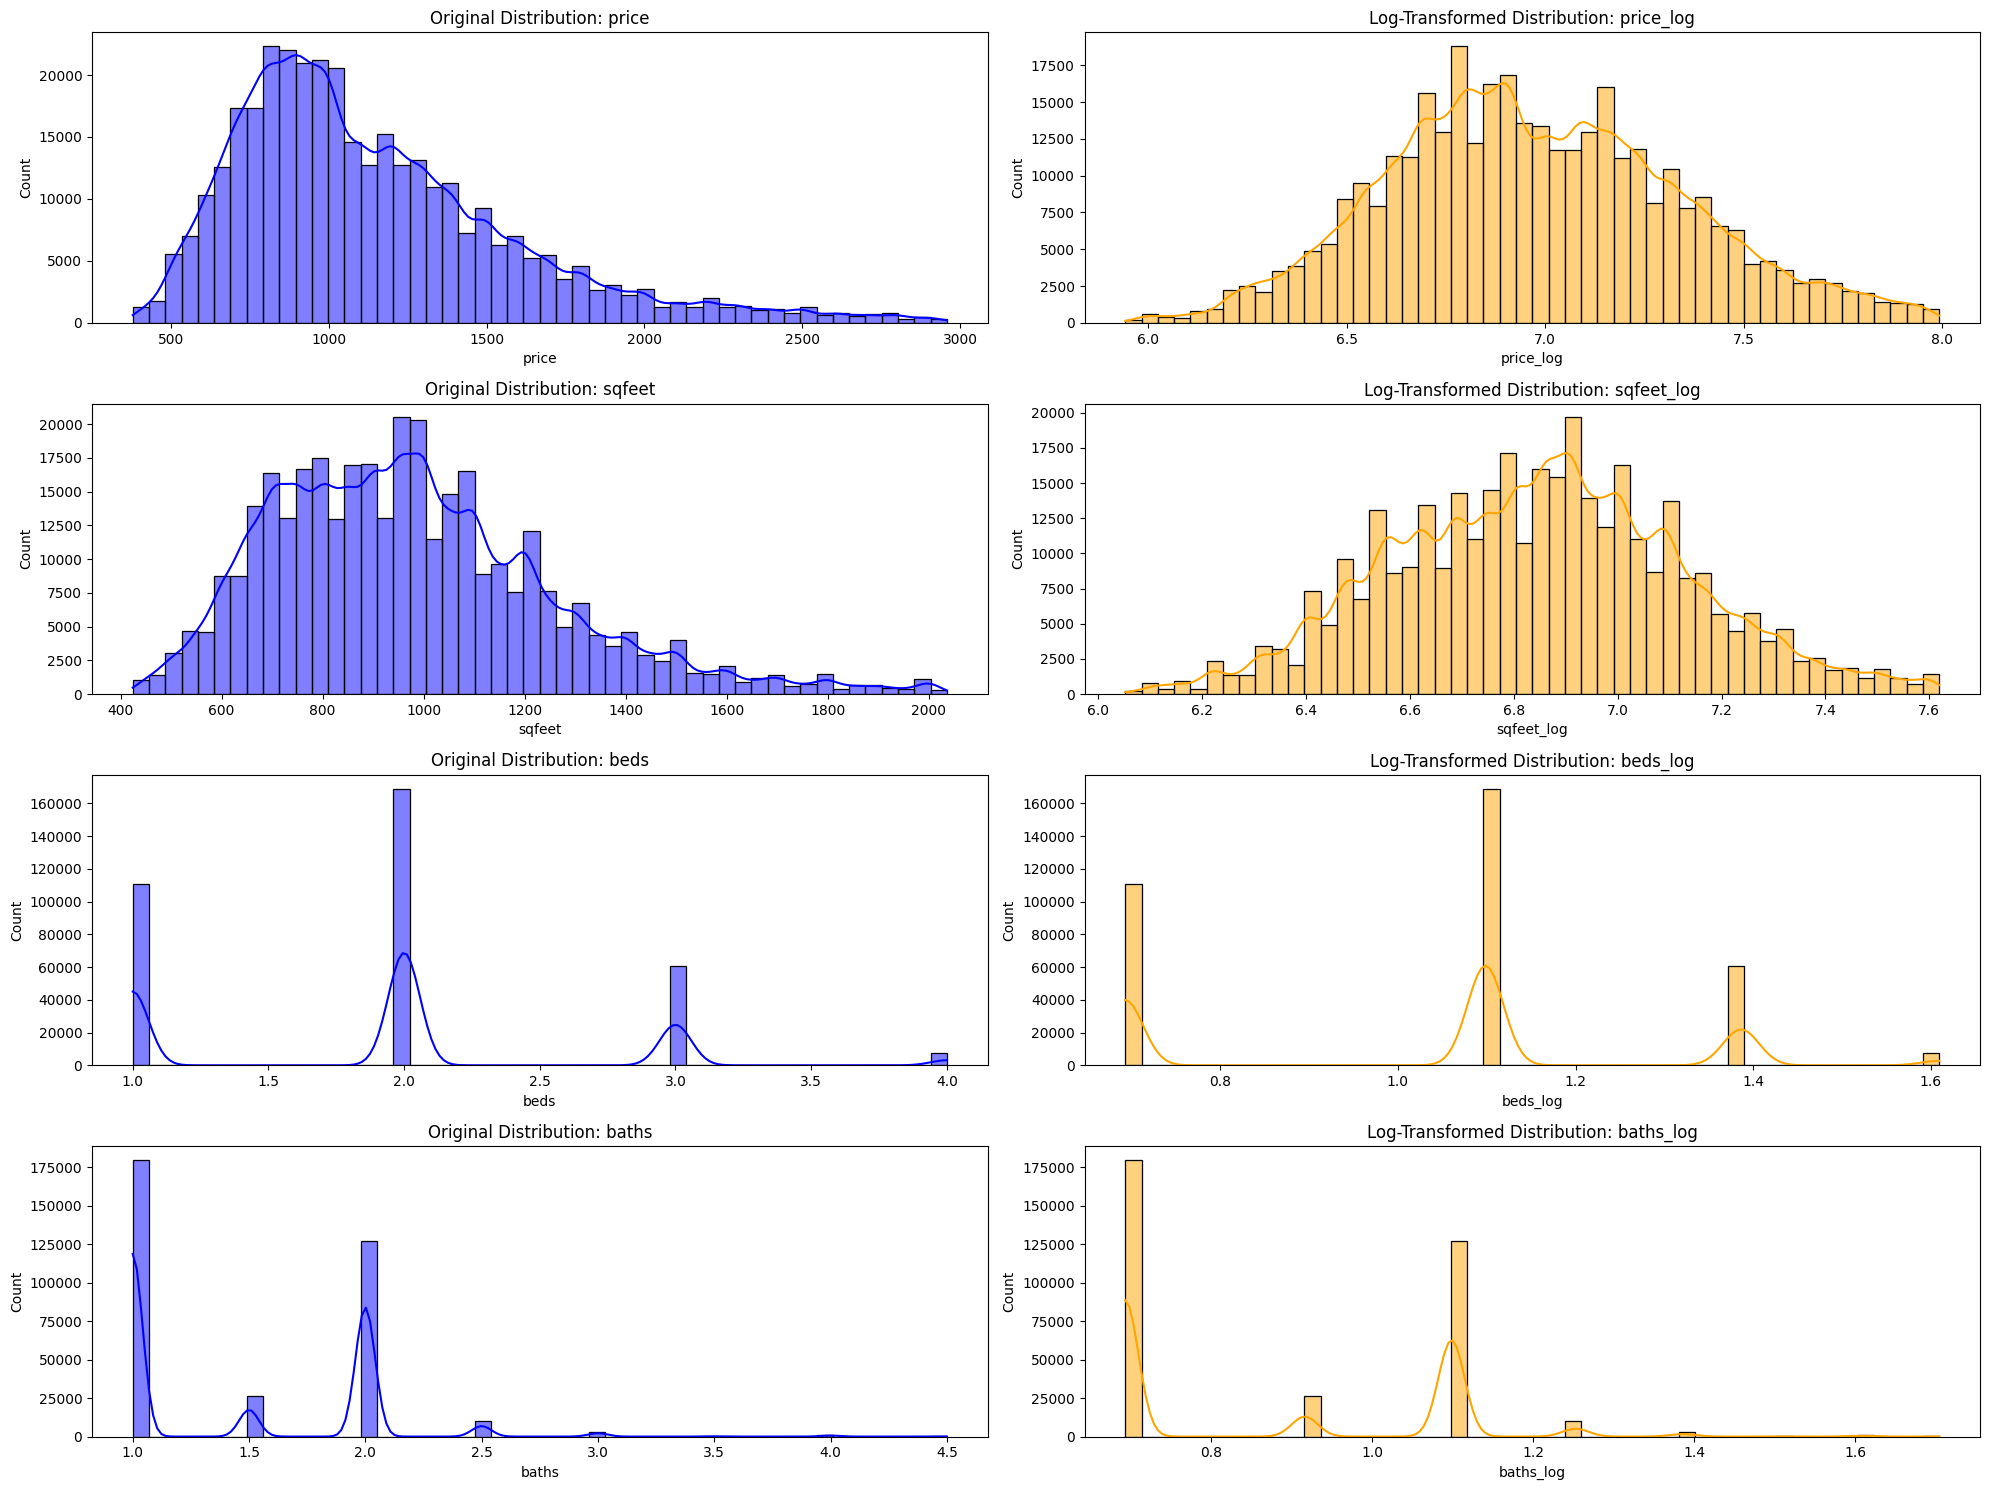

In [35]:
# Compare original and log-transformed distributions
original_columns = ['price', 'sqfeet', 'beds', 'baths']  # Adjust based on your data

plt.figure(figsize=(20, 15))
for i, col in enumerate(original_columns, 1):
    # Original column
    plt.subplot(4, 2, 2 * i - 1)
    sns.histplot(rental_data_cleaned[col], kde=True, bins=50, color='blue')
    plt.title(f'Original Distribution: {col}')

    # Log-transformed column
    plt.subplot(4, 2, 2 * i)
    sns.histplot(rental_data_cleaned[col + '_log'], kde=True, bins=50, color='orange')
    plt.title(f'Log-Transformed Distribution: {col}_log')

plt.tight_layout()
plt.show()


In [36]:
import pandas as pd

# Define original and log-transformed columns
original_columns = ['price', 'sqfeet', 'beds', 'baths']
log_columns = [col + '_log' for col in original_columns]

# Calculate correlations with the target variable (`price_log`)
correlations = {}

for col in original_columns + log_columns:
    correlations[col] = rental_data_cleaned[col].corr(rental_data_cleaned['price_log'])

# Convert correlations to a DataFrame for better readability
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with price_log'])

# Sort correlations by absolute value
correlation_df['Absolute Correlation'] = correlation_df['Correlation with price_log'].abs()
correlation_df = correlation_df.sort_values(by='Absolute Correlation', ascending=False)

# Display the correlation DataFrame
print(correlation_df)


            Correlation with price_log  Absolute Correlation
price_log                     1.000000              1.000000
price                         0.971290              0.971290
sqfeet_log                    0.323045              0.323045
sqfeet                        0.316241              0.316241
baths_log                     0.248052              0.248052
baths                         0.235921              0.235921
beds_log                      0.151342              0.151342
beds                          0.144953              0.144953


In [37]:
from sklearn.model_selection import train_test_split

# # --------- Sales Dataset ---------
# # Define features and target
# sales_X = sales_data.drop(columns=['Sale Amount', 'Sale Amount Log'])  # Features only
# sales_y = sales_data['Sale Amount Log']  # Target

# # Perform train-test split for Sales Dataset
# sales_X_train, sales_X_test, sales_y_train, sales_y_test = train_test_split(
#     sales_X, sales_y, test_size=0.2, random_state=42
# )

# --------- Rental Dataset ---------
# Define features and target
rental_X = rental_data_cleaned.drop(columns=['price', 'price_log'])  # Features only
rental_y = rental_data_cleaned['price_log']  # Target

# Perform train-test split for Rental Dataset
rental_X_train, rental_X_test, rental_y_train, rental_y_test = train_test_split(
    rental_X, rental_y, test_size=0.2, random_state=42
)

# Display the shapes of the splits
print("\nData Split Summary:")
# print(f"Sales Dataset - Training Features: {sales_X_train.shape}, Testing Features: {sales_X_test.shape}")
# print(f"Sales Dataset - Training Target: {sales_y_train.shape}, Testing Target: {sales_y_test.shape}")
print(f"Rental Dataset - Training Features: {rental_X_train.shape}, Testing Features: {rental_X_test.shape}")
print(f"Rental Dataset - Training Target: {rental_y_train.shape}, Testing Target: {rental_y_test.shape}")



Data Split Summary:
Rental Dataset - Training Features: (278529, 489), Testing Features: (69633, 489)
Rental Dataset - Training Target: (278529,), Testing Target: (69633,)


In [38]:
# Step 1: Drop the 'description' column
if 'description' in rental_X_train.columns:
    rental_X_train = rental_X_train.drop(columns=['description'])
    rental_X_test = rental_X_test.drop(columns=['description'])
    print("Dropped the 'description' column.")

# Step 2: Verify all remaining columns are numeric or boolean
non_numeric_columns = rental_X_train.select_dtypes(exclude=['number', 'bool']).columns
if len(non_numeric_columns) == 0:
    print("All columns in the rental dataset are numeric or boolean.")
else:
    print(f"Non-numeric columns remain: {non_numeric_columns.tolist()}")

# Step 3: Convert boolean columns to numeric (if not done automatically)
rental_X_train = rental_X_train.astype(float)
rental_X_test = rental_X_test.astype(float)



Dropped the 'description' column.
All columns in the rental dataset are numeric or boolean.


In [39]:
# from sklearn.model_selection import train_test_split

# # --------- Sales Dataset ---------
# # Define features and target
# sales_X = sales_data.drop(columns=['Sale Amount', 'Sale Amount Log'])  # Features only
# sales_y = sales_data['Sale Amount Log']  # Target

# # Perform train-test split for Sales Dataset
# sales_X_train, sales_X_test, sales_y_train, sales_y_test = train_test_split(
#     sales_X, sales_y, test_size=0.2, random_state=42
# )

# # --------- Rental Dataset ---------
# # Define features and target
# rental_X = rental_data_cleaned.drop(columns=['price', 'price_log'])  # Features only
# rental_y = rental_data_cleaned['price_log']  # Target

# # Perform train-test split for Rental Dataset
# rental_X_train, rental_X_test, rental_y_train, rental_y_test = train_test_split(
#     rental_X, rental_y, test_size=0.2, random_state=42
# )

# # Display the shapes of the splits
# print("\nData Split Summary:")
# print(f"Sales Dataset - Training Features: {sales_X_train.shape}, Testing Features: {sales_X_test.shape}")
# print(f"Sales Dataset - Training Target: {sales_y_train.shape}, Testing Target: {sales_y_test.shape}")
# print(f"Rental Dataset - Training Features: {rental_X_train.shape}, Testing Features: {rental_X_test.shape}")
# print(f"Rental Dataset - Training Target: {rental_y_train.shape}, Testing Target: {rental_y_test.shape}")


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as npzz

# Function to train and evaluate a baseline model
def baseline_model(X_train, X_test, y_train, y_test, dataset_name):
    print(f"Evaluating Baseline Model for {dataset_name}...\n")

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"{dataset_name} Metrics:")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 30)

    return model, y_pred

# Baseline model for Sales Dataset
# sales_model, sales_y_pred = baseline_model(sales_X_train, sales_X_test, sales_y_train, sales_y_test, "Sales Dataset")

# Baseline model for Rental Dataset
rental_model, rental_y_pred = baseline_model(rental_X_train, rental_X_test, rental_y_train, rental_y_test, "Rental Dataset")


Evaluating Baseline Model for Rental Dataset...

Rental Dataset Metrics:
  MAE: 0.1454
  RMSE: 0.2032
  R² Score: 0.7006
------------------------------


In [41]:
# Step 1: Identify non-numeric columns
non_numeric_columns = rental_X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns before handling:", non_numeric_columns)

# Step 2: Drop the 'description' column if it exists
if 'description' in rental_X_train.columns:
    rental_X_train = rental_X_train.drop(columns=['description'])
    rental_X_test = rental_X_test.drop(columns=['description'])
    print("Dropped the 'description' column.")

# Step 3: Verify and print remaining non-numeric columns
non_numeric_columns = rental_X_train.select_dtypes(exclude=['number']).columns
if len(non_numeric_columns) > 0:
    print("Remaining non-numeric columns:", non_numeric_columns)
    # Drop non-numeric columns
    rental_X_train = rental_X_train.drop(columns=non_numeric_columns)
    rental_X_test = rental_X_test.drop(columns=non_numeric_columns)
    print(f"Dropped remaining non-numeric columns: {non_numeric_columns.tolist()}")
else:
    print("All columns are numeric.")

# Step 4: Convert any boolean columns to float (if not done automatically)
rental_X_train = rental_X_train.astype(float)
rental_X_test = rental_X_test.astype(float)

# Step 5: Confirm all columns are numeric
non_numeric_columns = rental_X_train.select_dtypes(exclude=['number']).columns
if len(non_numeric_columns) == 0:
    print("All columns are numeric. Ready for modeling.")
else:
    print(f"Non-numeric columns still exist: {non_numeric_columns.tolist()}")

# Step 6: Retry the baseline model
try:
    rental_model, rental_y_pred = baseline_model(rental_X_train, rental_X_test, rental_y_train, rental_y_test, "Rental Dataset")
    print("Baseline model executed successfully.")
except Exception as e:
    print(f"Error during model execution: {e}")


Non-numeric columns before handling: Index([], dtype='object')
All columns are numeric.
All columns are numeric. Ready for modeling.
Evaluating Baseline Model for Rental Dataset...

Rental Dataset Metrics:
  MAE: 0.1454
  RMSE: 0.2032
  R² Score: 0.7006
------------------------------
Baseline model executed successfully.


In [42]:
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Assuming the Rental Dataset is already loaded
# # Replace these placeholders with your actual data
# # Example:
# # rental_X_train, rental_X_test, rental_y_train, rental_y_test = <your_data_loading_code>

# # Debugging - Confirming data shapes
# print("Rental Dataset - Training Features:", rental_X_train.shape)
# print("Rental Dataset - Testing Features:", rental_X_test.shape)
# print("Rental Dataset - Training Target:", rental_y_train.shape)
# print("Rental Dataset - Testing Target:", rental_y_test.shape)

# # Function to train, evaluate, and analyze feature importance
# def random_forest_model(X_train, X_test, y_train, y_test, dataset_name):
#     print(f"Evaluating Random Forest Model for {dataset_name}...\n")

#     # Initialize and train the model
#     model = RandomForestRegressor(random_state=42, n_estimators=100)
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)

#     # Evaluate metrics
#     mae = mean_absolute_error(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)

#     # Print metrics
#     print(f"{dataset_name} Metrics:")
#     print(f"  MAE: {mae:.4f}")
#     print(f"  RMSE: {rmse:.4f}")
#     print(f"  R² Score: {r2:.4f}")
#     print("-" * 30)

#     # Feature importance analysis
#     feature_importances = model.feature_importances_
#     feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

#     # Plot feature importance
#     sorted_idx = np.argsort(feature_importances)[::-1][:10]  # Top 10 features
#     plt.figure(figsize=(10, 6))
#     plt.barh([feature_names[i] for i in sorted_idx][::-1], feature_importances[sorted_idx][::-1])
#     plt.xlabel('Feature Importance')
#     plt.title(f'Top 10 Features - {dataset_name}')
#     plt.show()

#     return model, y_pred

# # Apply the Random Forest model to the Rental Dataset
# rental_rf_model, rental_rf_pred = random_forest_model(rental_X_train, rental_X_test, rental_y_train, rental_y_test, "Rental Dataset")


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Function to train, evaluate, and analyze feature importance
def random_forest_model(X_train, X_test, y_train, y_test, dataset_name):
    print(f"Evaluating Random Forest Model for {dataset_name}...\n")

    # Initialize and train the model
    model = RandomForestRegressor(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"{dataset_name} Metrics:")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 30)

    # # Feature importance analysis
    # feature_importances = model.feature_importances_
    # feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

    # # Plot feature importance
    # sorted_idx = np.argsort(feature_importances)[::-1][:10]  # Top 10 features
    # plt.figure(figsize=(10, 6))
    # plt.barh([feature_names[i] for i in sorted_idx][::-1], feature_importances[sorted_idx][::-1])
    # plt.xlabel('Feature Importance')
    # plt.title(f'Top 10 Features - {dataset_name}')
    # plt.show()

    return model, y_pred

# Apply the Random Forest model to the Sales Dataset
# sales_rf_model, sales_rf_pred = random_forest_model(sales_X_train, sales_X_test, sales_y_train, sales_y_test, "Sales Dataset")

# Apply the Random Forest model to the Rental Dataset
rental_rf_model, rental_rf_pred = random_forest_model(rental_X_train, rental_X_test, rental_y_train, rental_y_test, "Rental Dataset")


Evaluating Random Forest Model for Rental Dataset...

Rental Dataset Metrics:
  MAE: 0.0524
  RMSE: 0.1109
  R² Score: 0.9109
------------------------------


In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Example: Replace these with your actual datasets
# Assuming rental_X_train and rental_X_test are your datasets
# rental_X_train, rental_X_test = <load_your_data_here>

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply Standard Scaling
rental_X_train_scaled_standard = standard_scaler.fit_transform(rental_X_train)
rental_X_test_scaled_standard = standard_scaler.transform(rental_X_test)

# Apply MinMax Scaling
rental_X_train_scaled_minmax = minmax_scaler.fit_transform(rental_X_train)
rental_X_test_scaled_minmax = minmax_scaler.transform(rental_X_test)

# Print shapes to confirm scaling was applied
print("Standard Scaled Train Shape:", rental_X_train_scaled_standard.shape)
print("Standard Scaled Test Shape:", rental_X_test_scaled_standard.shape)
print("MinMax Scaled Train Shape:", rental_X_train_scaled_minmax.shape)
print("MinMax Scaled Test Shape:", rental_X_test_scaled_minmax.shape)


Standard Scaled Train Shape: (278529, 488)
Standard Scaled Test Shape: (69633, 488)
MinMax Scaled Train Shape: (278529, 488)
MinMax Scaled Test Shape: (69633, 488)


Training Deep Learning Model for Rental Dataset...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3482/3482 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 2.6544 - mae: 0.9726 - val_loss: 0.4959 - val_mae: 0.6643
Epoch 2/100
3482/3482 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0793 - mae: 0.2081 - val_loss: 0.1048 - val_mae: 0.2675
Epoch 3/100
3482/3482 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0450 - mae: 0.1564 - val_loss: 0.0511 - val_mae: 0.1735
Epoch 4/100
3482/3482 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0394 - mae: 0.1449 - val_loss: 0.0371 - val_mae: 0.1408
Epoch 5/100
3482/3482 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0370 - mae: 0.1392 - val_loss: 0.0369 - val_mae: 0.1400
Epoch 6/100
3482/3482 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0351 - mae: 0.1356 - val_loss: 0.0360 - val_mae: 0.1401
Epoch 7/100
3482/3482 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0338 - mae: 0.1326 - val_loss: 0.0330 - val_mae: 0.1308
Epoch 8/100
3482/3482 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0331 - mae: 0.1307 - val_loss: 0.0322 - val_mae: 0.1296
Epoch 9/100
3482/3482 ━━━━━━━━━

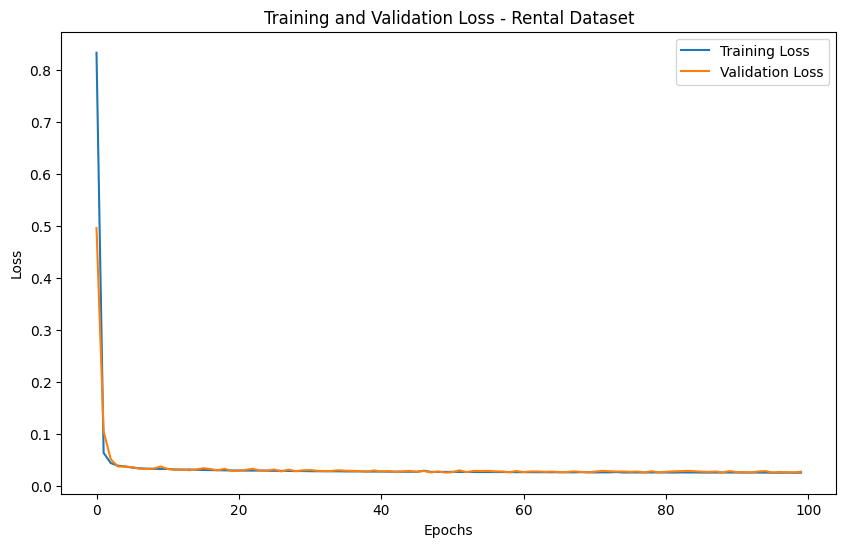

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to build, train, and evaluate a deep learning model
def deep_learning_model(X_train, X_test, y_train, y_test, dataset_name, epochs=50, batch_size=32):
    print(f"Training Deep Learning Model for {dataset_name}...\n")

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the feedforward neural network
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(X_train_scaled, y_train,
                        validation_split=0.2,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1)

    # Evaluate the model on the test set
    y_pred = model.predict(X_test_scaled).flatten()
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"{dataset_name} Metrics:")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 30)

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss - {dataset_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return model, y_pred

# Apply the deep learning model to the Rental Dataset
rental_dl_model, rental_dl_pred = deep_learning_model(
    rental_X_train, rental_X_test, rental_y_train, rental_y_test, "Rental Dataset", epochs=100, batch_size=64
)


In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 40)
    return mae, rmse, r2

# Feature Scaling
def scale_features(X_train, X_test, method='standard'):
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaling method. Choose 'standard' or 'minmax'.")
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Optimized LightGBM Model
def optimized_lightgbm(X_train, X_test, y_train, y_test):
    lgb_model = lgb.LGBMRegressor()
    param_grid = {
        'n_estimators': [500, 1000, 1500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [5, 10, 15],
        'num_leaves': [31, 50, 100],
        'min_child_weight': [0.001, 0.01, 0.1],
    }
    grid_search = RandomizedSearchCV(
        lgb_model, param_grid, scoring='neg_mean_squared_error',
        n_iter=10, cv=3, random_state=42, verbose=1, n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    return y_pred, best_model

# Optimized Deep Learning Model
def optimized_deep_learning(X_train, X_test, y_train, y_test, input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, verbose=1),
        EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
    ]

    model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=200, batch_size=256, callbacks=callbacks, verbose=1)

    y_pred = model.predict(X_test).flatten()
    return y_pred, model

# Ensemble Predictions
def ensemble_predictions(pred1, pred2, weights=(0.5, 0.5)):
    return weights[0] * pred1 + weights[1] * pred2

# Main Function
def main(X, y):
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature Scaling
    X_train_scaled, X_test_scaled = scale_features(X_train, X_test, method='standard')

    # LightGBM
    print("Optimizing LightGBM Model...")
    y_pred_lgb, lgb_model = optimized_lightgbm(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred_lgb, "Optimized LightGBM")

    # Deep Learning
    print("Optimizing Deep Learning Model...")
    y_pred_dl, dl_model = optimized_deep_learning(X_train_scaled, X_test_scaled, y_train, y_test, input_dim=X_train.shape[1])
    evaluate_model(y_test, y_pred_dl, "Optimized Deep Learning")

    # Ensemble
    print("Combining Predictions with Ensemble...")
    y_pred_ensemble = ensemble_predictions(y_pred_lgb, y_pred_dl, weights=(0.6, 0.4))
    evaluate_model(y_test, y_pred_ensemble, "Optimized Ensemble")

    return lgb_model, dl_model, y_pred_lgb, y_pred_dl, y_pred_ensemble


In [47]:
# Check and preprocess numeric features
def ensure_numeric_features(X):
    # Drop non-numeric columns if any
    non_numeric_cols = X.select_dtypes(include=['object', 'string']).columns
    if len(non_numeric_cols) > 0:
        print(f"Dropping Non-Numeric Columns: {list(non_numeric_cols)}")
        X = X.drop(columns=non_numeric_cols)
    return X

# Feature Scaling
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Main Workflow
# Ensure all features are numeric
X_train = ensure_numeric_features(X_train)
X_test = ensure_numeric_features(X_test)

# Scale the features
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

# Train and evaluate the deep learning model
y_pred_dl, dl_model = train_deep_learning_model(X_train_scaled, X_test_scaled, y_train, y_test)


NameError: name 'X_train' is not defined